<a href="https://colab.research.google.com/github/kameshDiviyanjana/DL-7/blob/main/lab_7_AE_FFNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [3]:
class Autoencoder(Model):
  def __init__(self, latent_dim, shape):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.shape = shape
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(tf.math.reduce_prod(shape).numpy(), activation='sigmoid'),
      layers.Reshape(shape)
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


shape = x_test.shape[1:]
latent_dim = 64
autoencoder = Autoencoder(latent_dim, shape)

In [4]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [5]:
autoencoder.fit(x_train, x_train,
                epochs=30,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0392 - val_loss: 0.0132
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0124 - val_loss: 0.0108
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0104 - val_loss: 0.0098
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0096 - val_loss: 0.0094
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - loss: 0.0092 - val_loss: 0.0094
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - loss: 0.0091 - val_loss: 0.0092
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.0089 - val_loss: 0.0091
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0088 - val_loss: 0.0088
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0087 - val_loss: 0.0088
Epoch 12/30
1875/1875 ━━━

In [ ]:
print(autoencoder.encoder.summary())
print('\n\n')
print(autoencoder.decoder.summary())
print('\n\n')
print(autoencoder.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (32, 784)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (32, 64)                    │          50,240 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,240 (196.25 KB)

 Trainable params: 50,240 (196.25 KB)

 Non-trainable params: 0 (0.00 B)

None





Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (32, 784)                   │          50,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_2 (Reshape)                  │ (32, 28, 28)                │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,960 (199.06 KB)

 Trainable params: 50,960 (199.06 KB)

 Non-trainable params: 0 (0.00 B)

None





Model: "autoencoder_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)            │ (32, 64)                    │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_5 (Sequential)            │ (32, 28, 28)                │          50,960 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 303,602 (1.16 MB)

 Trainable params: 101,200 (395.31 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 202,402 (790.64 KB)

None


In [6]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

In [7]:
decoded_imgs.shape

(10000, 28, 28)

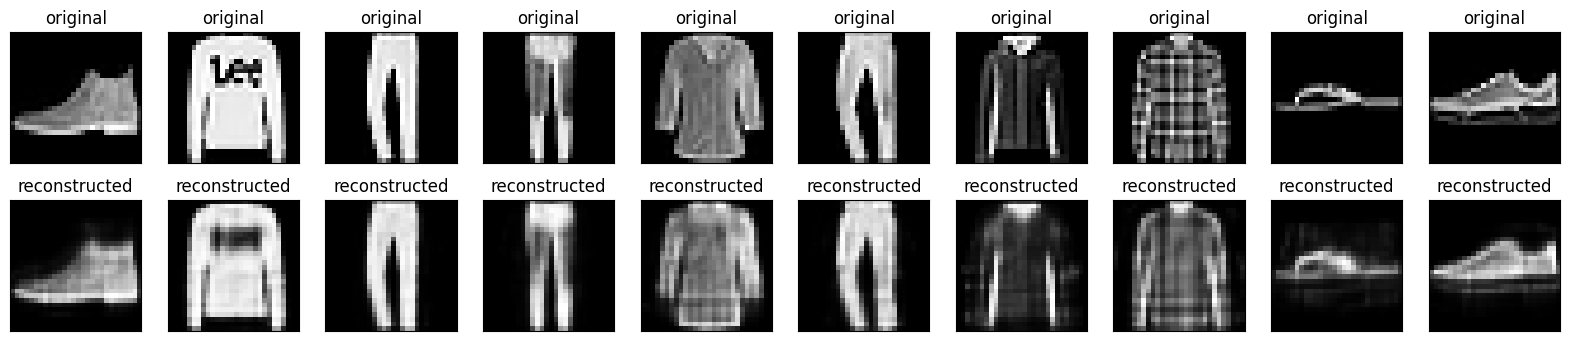

In [8]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [20]:
batch_size = 32
test_dataset = tf.data.Dataset.from_tensor_slices(x_test).batch(batch_size)
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.datasets import fashion_mnist
import numpy as np

# Define the Mean Squared Error loss function
# mse_loss = MeanSquaredError()

# # Assuming `autoencoder` is your trained model and `test_dataset` is your test dataset
# def calculate_test_loss(autoencoder, test_dataset):
#     test_loss = 0
#     for data in test_dataset:
#         # Forward pass
#         reconstructed = autoencoder(data, training=False)

#         # Compute the MSE loss
#         loss = mse_loss(data, reconstructed)
#         test_loss += loss.numpy()

#     # Return the average test loss
#     return test_loss / len(test_dataset)

# # Example usage
# test_loss = calculate_test_loss(autoencoder,x_test)
# print(f'Average Test Loss (MSE): {test_loss:.4f}')
def calculate_test_loss(autoencoder, test_dataset):
    test_loss = 0
    for data in test_dataset:
        # Forward pass
        reconstructed = autoencoder(data, training=False)

        # Compute the MSE loss
    #     loss = tf.keras.losses.mean_squared_error(data, reconstructed)
    #     test_loss += tf.reduce_mean(loss).numpy()  # Mean over the batch

    # # Return the average test loss
    # return test_loss / len(test_dataset)
        loss = mse_loss(data, reconstructed)
        test_loss += loss.numpy()

    # Return the average test loss
        return test_loss / len(test_dataset)

# Create a TensorFlow dataset from x_test
test_dataset = tf.data.Dataset.from_tensor_slices(x_test).batch(32)

# Calculate the test loss
test_loss = calculate_test_loss(autoencoder, test_dataset)
print(f'Average Test Loss (MSE): {test_loss:.4f}')

Average Test Loss (MSE): 0.0000


Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0396 - val_loss: 0.0133
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0123 - val_loss: 0.0107
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0103 - val_loss: 0.0097
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0095 - val_loss: 0.0094
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0092 - val_loss: 0.0091
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0090 - val_loss: 0.0091
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0088 - val_loss: 0.0088
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0088 - val_loss: 0.0088
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0087 - val_loss: 0.0089
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0087 - val_loss: 0.0088
Epoch 12/30
1875/1875 ━━━━━

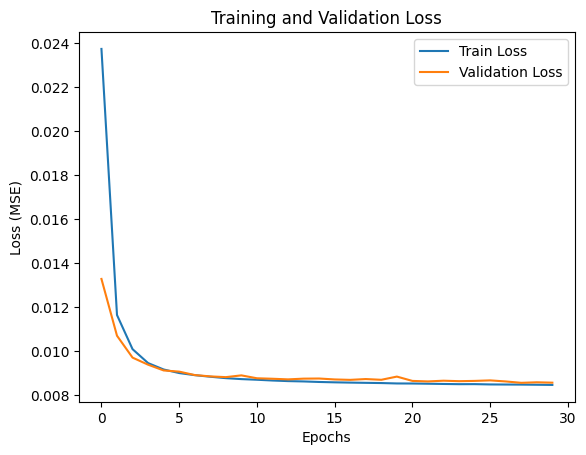

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.datasets import fashion_mnist

# Load and preprocess the Fashion MNIST dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Define the Autoencoder model
class Autoencoder(Model):
    def __init__(self, latent_dim, shape):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim
        self.shape = shape

        # Encoder
        self.encoder = tf.keras.Sequential([
            layers.Flatten(),
            layers.Dense(latent_dim, activation='relu'),
        ])

        # Decoder
        self.decoder = tf.keras.Sequential([
            layers.Dense(np.prod(shape), activation='sigmoid'),
            layers.Reshape(shape)
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Set parameters and create the autoencoder
shape = x_train.shape[1:]  # Shape of each image (28, 28)
latent_dim = 64  # Dimensionality of the latent space
autoencoder = Autoencoder(latent_dim, shape)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

# Fit the model
history = autoencoder.fit(x_train, x_train,
                          epochs=30,
                          shuffle=True,
                          validation_data=(x_test, x_test))

# Function to calculate test loss
def calculate_test_loss(autoencoder, test_dataset):
    mse_loss = MeanSquaredError()
    test_loss = 0
    for data in test_dataset:
        # Forward pass
        reconstructed = autoencoder(data, training=False)

        # Compute the MSE loss
        loss = mse_loss(data, reconstructed)
        test_loss += loss.numpy()

    # Return the average test loss
    return test_loss / len(test_dataset)

# Create a test dataset from x_test
batch_size = 32
test_dataset = tf.data.Dataset.from_tensor_slices(x_test).batch(batch_size)

# Calculate and print the average test loss
test_loss = calculate_test_loss(autoencoder, test_dataset)
print(f'Average Test Loss (MSE): {test_loss:.4f}')

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()
